# Import Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Import The Dataset

In [4]:
dataset = pd.read_excel('E:\Datasets for Thesis\DATASET TO USE FOR NEW REC_RATE\Dataset_with_rec_rate.xlsx')

# Describe the Dataset

In [10]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 44 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   AGE                      40000 non-null  int64         
 1   DATE_OF_LOAN             40000 non-null  datetime64[ns]
 2   DATE_FROM                40000 non-null  datetime64[ns]
 3   DATE_WO                  40000 non-null  datetime64[ns]
 4   DEFAULT_L12M             40000 non-null  int64         
 5   DEFAULT_L6M              40000 non-null  int64         
 6   DEFAULT_L3M              40000 non-null  int64         
 7   DELQ_L12M                40000 non-null  int64         
 8   DELQ_L6M                 40000 non-null  int64         
 9   DELQ_L3M                 40000 non-null  int64         
 10  loan_amnt                40000 non-null  int64         
 11  int_rate                 40000 non-null  float64       
 12  installment              40000 n

In [11]:
dataset.describe().T

,count,mean,min,25%,50%,75%,max,std
AGE,40000.0,34.44935,24.0,27.0,34.0,40.0,65.0,8.580252
DATE_OF_LOAN,40000,2016-07-03 21:10:24.240000,2014-01-01 00:00:00,2015-04-05 00:00:00,2016-07-02 00:00:00,2017-10-03 00:00:00,2018-12-31 00:00:00,NaN
DATE_FROM,40000,2019-02-15 09:04:36.480000,2014-04-22 00:00:00,2017-09-05 00:00:00,2019-02-16 00:00:00,2020-07-22 00:00:00,2023-12-29 00:00:00,NaN
DATE_WO,40000,2021-11-12 05:33:19.440000,2015-01-25 00:00:00,2020-03-14 00:00:00,2021-11-09 00:00:00,2023-07-18 00:00:00,2028-08-12 00:00:00,NaN
DEFAULT_L12M,40000.0,0.303925,0.0,0.0,0.0,1.0,1.0,0.459956
DEFAULT_L6M,40000.0,0.3985,0.0,0.0,0.0,1.0,1.0,0.489595
DEFAULT_L3M,40000.0,0.47655,0.0,0.0,0.0,1.0,1.0,0.499456
DELQ_L12M,40000.0,6.497375,0.0,5.0,6.0,8.0,12.0,2.010397
DELQ_L6M,40000.0,3.47315,0.0,2.0,3.0,5.0,6.0,1.461312
DELQ_L3M,40000.0,1.510075,0.0,1.0,2.0,2.0,3.0,0.941685


In [12]:
dataset.isnull().sum()

AGE                        0
DATE_OF_LOAN               0
DATE_FROM                  0
DATE_WO                    0
DEFAULT_L12M               0
DEFAULT_L6M                0
DEFAULT_L3M                0
DELQ_L12M                  0
DELQ_L6M                   0
DELQ_L3M                   0
loan_amnt                  0
int_rate                   0
installment                0
grade                      0
sub_grade                  0
home_ownership             0
annual_inc                 0
dti                        0
postal_code                0
revol_bal                  0
revol_util                 0
total_acc                  0
out_prncp                  0
total_pymnt                0
total_rec_prncp            0
total_rec_int              0
total_rec_late_fee         0
recoveries                 0
collection_recovery_fee    0
total_rev_hi_lim           0
arrears                    0
marital_status_code        0
writeoff_amnt              0
EAD                        0
ITI           

# Preprocess the Data

- Split the Numerical and Caterorical Features
- Process the Datetime Features 
- Check for outliers 
- Manage the Categorical Features
- Scale all the Features

## Split the Numerical and Categorical Features

In [13]:
numerical_features = dataset.select_dtypes(include=['float64', 'int64'])
categorical_features = dataset.select_dtypes(include=['object', 'datetime64'])

In [14]:
numerical_features

,AGE,DEFAULT_L12M,DEFAULT_L6M,DEFAULT_L3M,DELQ_L12M,DELQ_L6M,DELQ_L3M,loan_amnt,int_rate,installment,...,ITI,mortg_market_value,RESIDENTIAL,URBANISATION,outdef_healthy,Euribor_3,LTV,NHG,cure,rec_rate
0,28,0,1,0,7,2,1,20000,12.29,667.06,...,5.39,54621.41,1,0,1,-0.3210,0.55,1,1,0.298
1,28,0,1,1,3,3,2,11000,12.69,369.00,...,7.75,113355.84,0,1,1,-0.3290,0.72,1,0,0.287
2,25,0,0,0,5,4,3,7000,9.99,225.84,...,1.33,95969.98,0,1,0,-0.0265,0.60,1,1,0.279
3,25,0,0,0,5,2,0,10000,10.99,327.34,...,5.98,86384.12,0,1,1,-0.3290,0.54,1,1,0.292
4,40,0,1,0,4,6,2,9550,19.99,354.87,...,2.72,28287.07,0,1,1,0.1825,0.42,0,0,0.127
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39995,27,0,1,0,8,2,2,20000,15.41,480.12,...,1.92,102153.61,0,0,0,-0.3290,0.67,1,1,0.275
39996,47,0,1,0,4,5,0,16000,9.99,339.88,...,8.07,96657.58,1,1,0,-0.0265,0.99,1,1,0.257
39997,35,1,1,1,8,0,1,8000,12.59,267.98,...,1.00,43225.71,0,0,1,0.1825,0.59,0,1,0.219
39998,24,0,1,0,7,3,1,10000,13.67,340.18,...,8.13,62905.43,1,0,1,-0.0265,0.42,1,0,0.245


In [15]:
categorical_features

,DATE_OF_LOAN,DATE_FROM,DATE_WO,grade,sub_grade,home_ownership,postal_code,marital_status_code
0,2018-04-24,2020-10-29,2022-01-12,C,C1,OWN,FR-31002,Married
1,2017-06-11,2020-08-20,2023-11-21,C,C2,MORTGAGE,FR-31000,Divorced
2,2015-11-16,2019-04-03,2023-11-22,B,B3,MORTGAGE,BE-9004,Divorced
3,2017-08-20,2021-06-17,2023-11-21,B,B4,MORTGAGE,NL-3014,Divorced
4,2014-11-15,2016-08-28,2020-10-20,E,E4,RENT,FR-31003,Married
...,...,...,...,...,...,...,...,...
39995,2017-01-13,2017-09-06,2021-11-13,D,D1,OWN,FR-69001,Divorced
39996,2015-07-18,2016-06-15,2020-03-27,B,B3,OWN,FR-69001,Unmarried
39997,2014-06-21,2017-11-07,2018-08-23,C,C2,RENT,BE-9000,Unmarried
39998,2015-01-31,2017-04-02,2017-11-10,C,C4,RENT,BE-1010,Divorced


## Process the Datetime Features

In [16]:
# Convert to datetime format
dataset['DATE_OF_LOAN'] = pd.to_datetime(dataset['DATE_OF_LOAN'])
dataset['DATE_FROM'] = pd.to_datetime(dataset['DATE_FROM'])
dataset['DATE_WO'] = pd.to_datetime(dataset['DATE_WO'])

# Extract features from DATE_OF_LOAN
#dataset['loan_year'] = dataset['DATE_OF_LOAN'].dt.year
dataset['loan_month'] = dataset['DATE_OF_LOAN'].dt.month
#dataset['loan_day_of_week'] = dataset['DATE_OF_LOAN'].dt.dayofweek

# Extract features from DATE_FROM
#dataset['default_year'] = dataset['DATE_FROM'].dt.year
dataset['default_month'] = dataset['DATE_FROM'].dt.month
#dataset['default_day_of_week'] = dataset['DATE_FROM'].dt.dayofweek

# Extract features from DATE_WO
#dataset['wo_year'] = dataset['DATE_WO'].dt.year
dataset['wo_month'] = dataset['DATE_WO'].dt.month
#dataset['wo_day_of_week'] = dataset['DATE_WO'].dt.dayofweek

# Calculate time differences
dataset['loan_to_default_days'] = (dataset['DATE_FROM'] - dataset['DATE_OF_LOAN']).dt.days
dataset['loan_to_wo_days'] = (dataset['DATE_WO'] - dataset['DATE_OF_LOAN']).dt.days
dataset['default_to_wo_days'] = (dataset['DATE_WO'] - dataset['DATE_FROM']).dt.days


# Drop original datetime columns if no longer needed
dataset = dataset.drop(columns=['DATE_OF_LOAN', 'DATE_FROM', 'DATE_WO'])

## Manage the Categorical Features

### OneHotEncoder

**marital_status_code**

In [17]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder()

encoded_data = encoder.fit_transform(dataset[['marital_status_code']]).toarray()

encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(['marital_status_code']))

dataset = pd.concat([dataset, encoded_df], axis=1)

dataset.drop(columns=['marital_status_code'], inplace=True)

**For the postal_code we exctract the city and the country the postal_code indicates**

### LabelEncoder

**grade sub_grade home_ownership**

In [18]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()

encoded_data = dataset[['home_ownership', 'grade', 'sub_grade']].apply(encoder.fit_transform)

dataset.drop(columns=['home_ownership', 'grade', 'sub_grade'], inplace=True)

dataset = pd.concat([dataset, encoded_data], axis=1)

**Get city and country**

In [19]:
df_second_sheet = pd.read_excel('Updated.xlsx', sheet_name='feature_engineering')

In [20]:
encoder = OneHotEncoder()

encoded_data = encoder.fit_transform(df_second_sheet[['country', 'city']]).toarray()

encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(['country', 'city']))

dataset = pd.concat([dataset, encoded_df], axis=1)

dataset = dataset.drop(columns=['postal_code'])

## Scaling the Features

In [23]:
features_for_scale = dataset.iloc[:, :28]

**Standard Scaler**

In [10]:
from sklearn.preprocessing import StandardScaler

s_scaler = StandardScaler()
df_standard_scaled = s_scaler.fit_transform(features_for_scale)
df_standard_scaled = pd.DataFrame(df_standard_scaled, columns=features_for_scale.columns)

In [11]:
df_sc = dataset
df_sc.iloc[:, :28] = df_standard_scaled

**MinMax Scaler**

In [24]:
from sklearn.preprocessing import MinMaxScaler

m_scaler = MinMaxScaler()
df_minmax_scaled = m_scaler.fit_transform(features_for_scale)
df_minmax_scaled = pd.DataFrame(df_minmax_scaled, columns=features_for_scale.columns)

In [25]:
df_mms = dataset
df_mms.iloc[:, :28] = df_minmax_scaled

C:\Users\comad\AppData\Local\Temp\ipykernel_20344\1169819679.py:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0        0.097561
1        0.097561
2        0.024390
3        0.024390
4        0.390244
           ...   
39995    0.073171
39996    0.560976
39997    0.268293
39998    0.000000
39999    0.000000
Name: AGE, Length: 40000, dtype: float64' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df_mms.iloc[:, :28] = df_minmax_scaled
C:\Users\comad\AppData\Local\Temp\ipykernel_20344\1169819679.py:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
39995    0.0
39996    0.0
39997    1.0
39998    0.0
39999    1.0
Name: DEFAULT_L12M, Length: 40000, dtype: float64' has dtype incompatible with int64, please explicitly cast to a compa

## Correlation Analysis

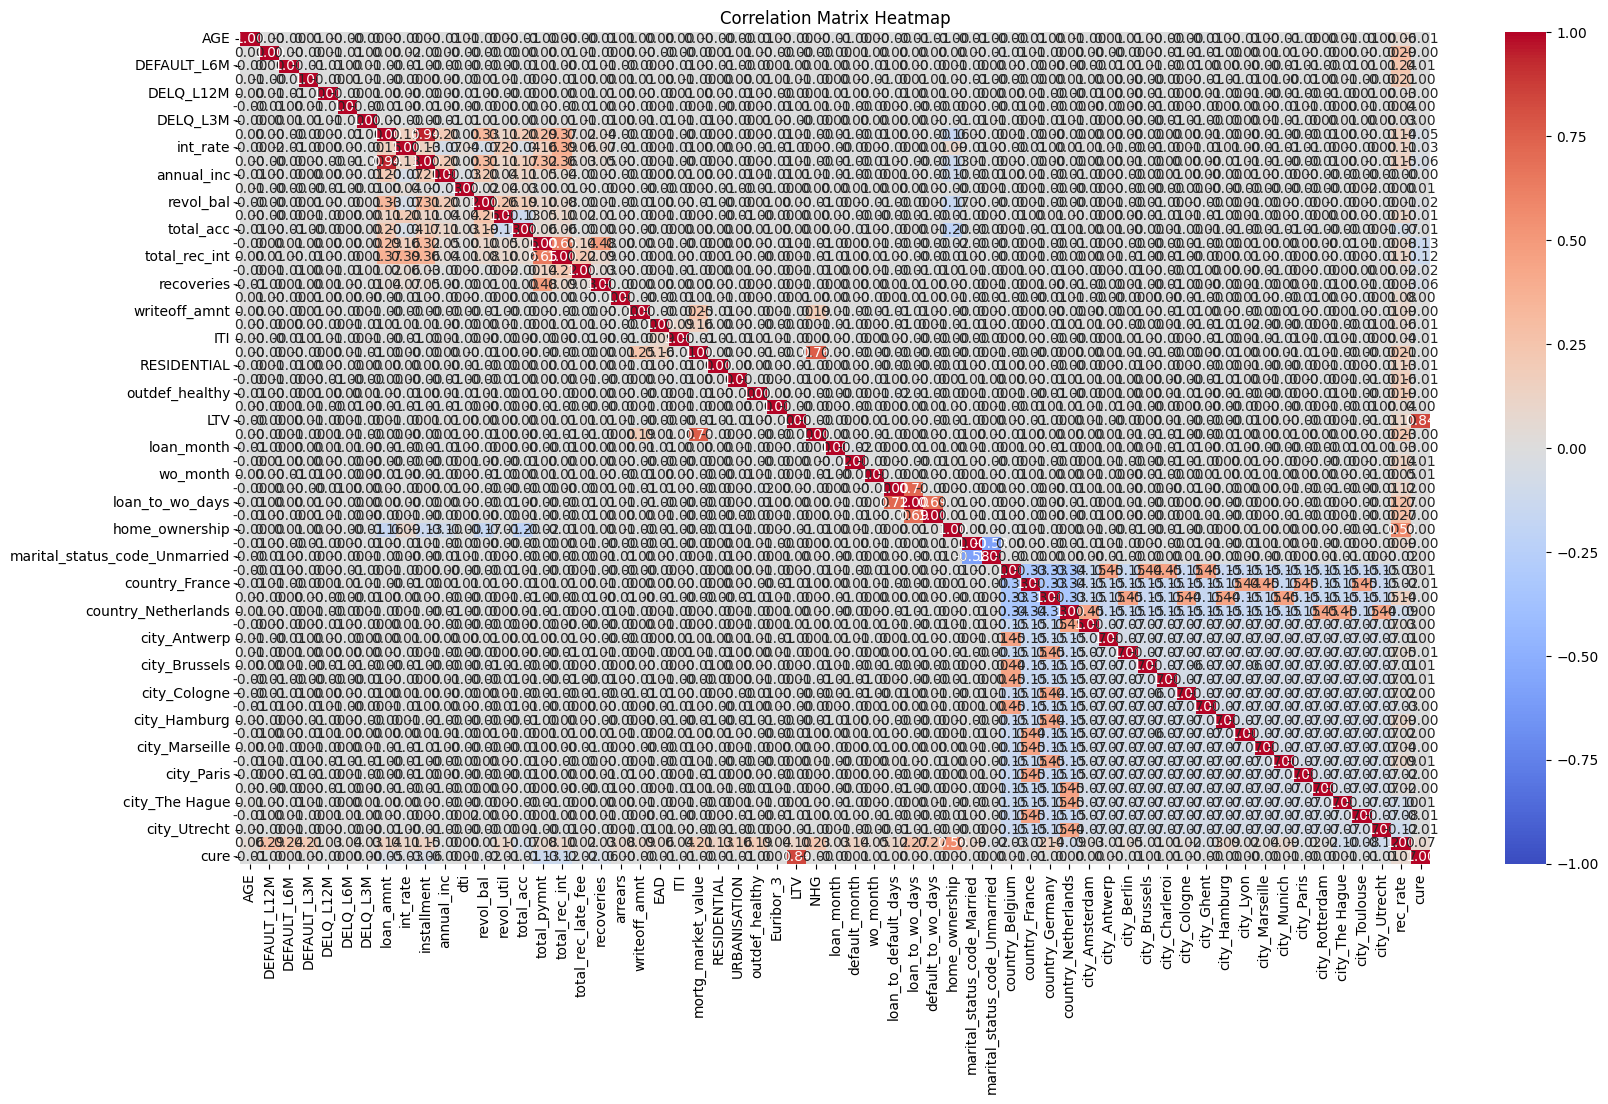

In [5]:
# Compute the correlation matrix
correlation_matrix = dataset.corr()

plt.figure(figsize=(19.2, 10.8), dpi=100) 
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix Heatmap')
plt.show()

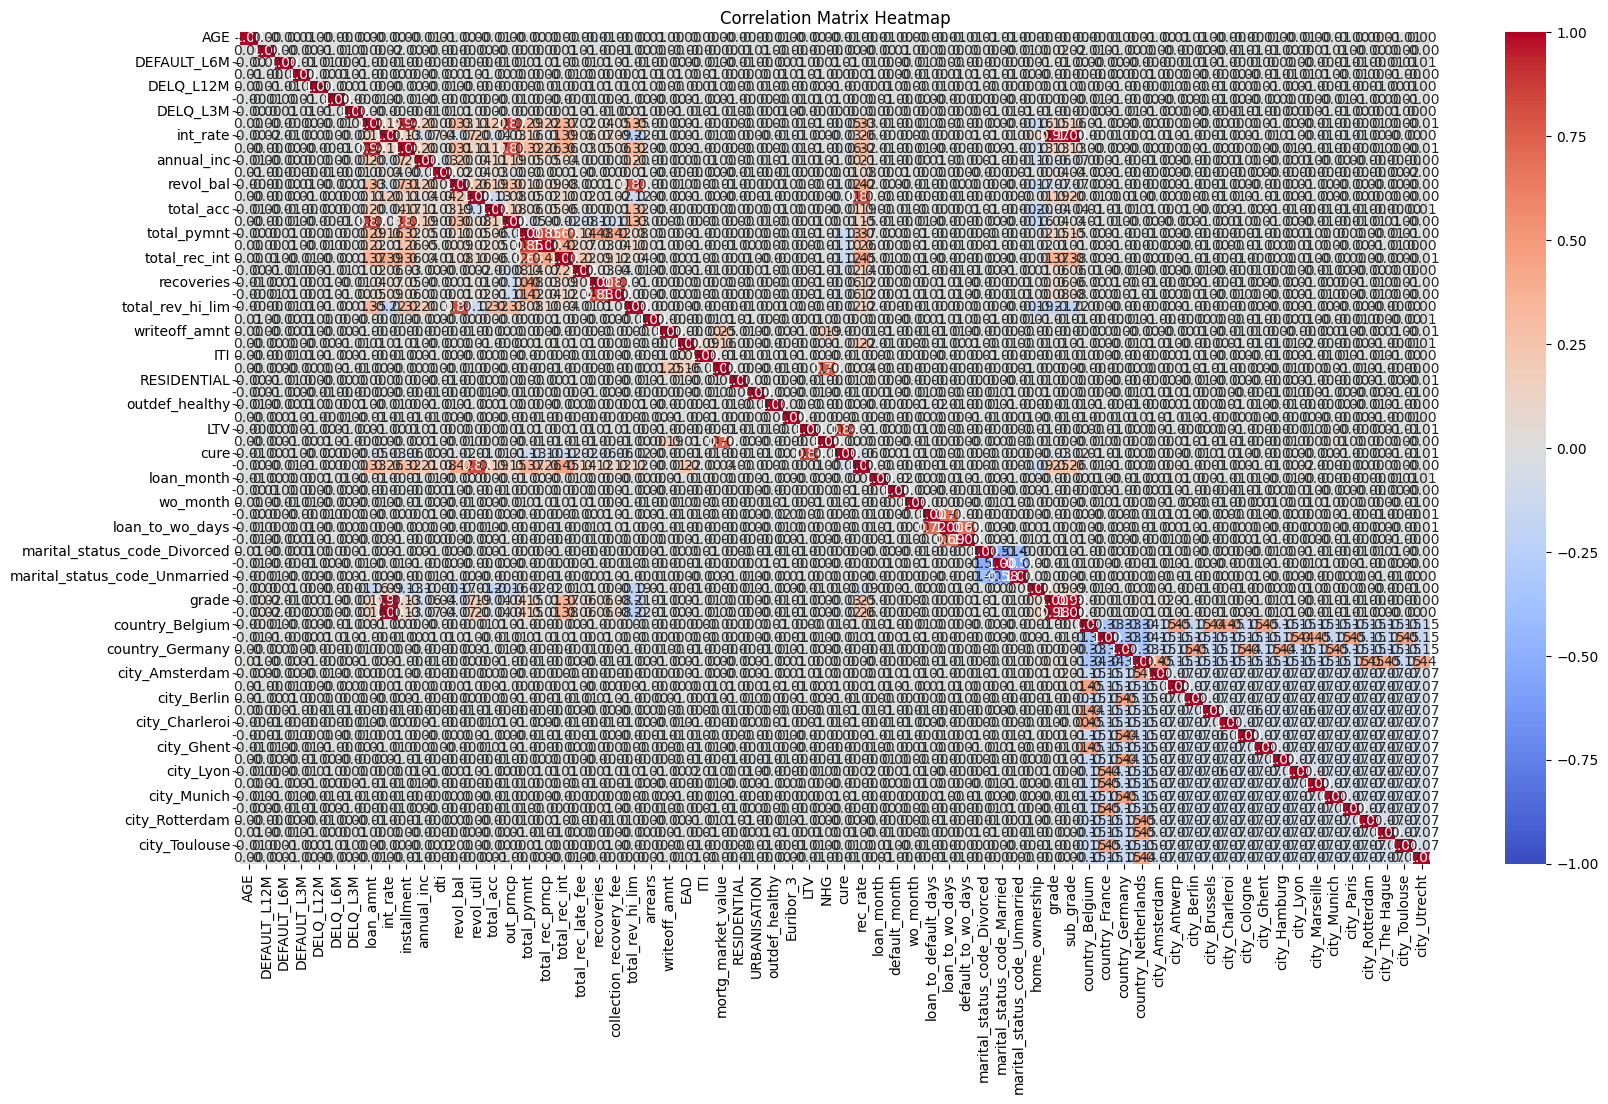

In [26]:
# Compute the correlation matrix
correlation_matrix = df_mms.corr()

plt.figure(figsize=(19.2, 10.8), dpi=100) 
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix Heatmap')
plt.show()

In [7]:
# Identify highly correlated features
threshold = 0.85
high_corr_pairs = []

for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > threshold:
            colname = correlation_matrix.columns[i]
            rowname = correlation_matrix.index[j]
            high_corr_pairs.append((rowname, colname, correlation_matrix.iloc[i, j]))

high_corr_pairs

[('loan_amnt', 'installment', 0.9437023858128519)]

In [28]:
df_mms = df_mms.drop(columns=['out_prncp', 'total_rec_prncp', 'collection_recovery_fee', 'total_rev_hi_lim', 'grade', 'sub_grade'])

In [30]:
df_mms.to_excel('df_mms_after_corr_an.xlsx', index=False)

## IV TESTS AND C-STAT

In [13]:
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import LabelEncoder


# Function to calculate Information Value (IV)
def calculate_iv(df, feature, target):
    lst = []
    for i in range(df[feature].nunique()):
        val = df[feature].unique()[i]
        lst.append({
            'Value': val,
            'All': df[df[feature] == val].count()[feature],
            'Bad': df[(df[feature] == val) & (df[target] == 1)].count()[feature],
            'Good': df[(df[feature] == val) & (df[target] == 0)].count()[feature]
        })
    iv_df = pd.DataFrame(lst)
    iv_df['Distribution Good'] = iv_df['Good'] / iv_df['Good'].sum()
    iv_df['Distribution Bad'] = iv_df['Bad'] / iv_df['Bad'].sum()
    iv_df['WoE'] = np.log(iv_df['Distribution Good'] / iv_df['Distribution Bad'])
    iv_df['IV'] = (iv_df['Distribution Good'] - iv_df['Distribution Bad']) * iv_df['WoE']
    iv = iv_df['IV'].sum()
    return iv

# Function to calculate AUC-ROC
def calculate_auc(df, feature, target):
    le = LabelEncoder()
    feature_encoded = le.fit_transform(df[feature])
    auc = roc_auc_score(df[target], feature_encoded)
    return auc

In [15]:
# Apply IV and AUC calculation for each feature
target_variable = 'cure'
results = []

for feature in dataset.columns:
    iv = calculate_iv(dataset, feature, target_variable)
    auc = calculate_auc(dataset, feature, target_variable)
    results.append({'Feature': feature, 'IV': iv, 'AUC': auc})

results_df = pd.DataFrame(results)
#results_df.to_excel("feature_iv_auc_results.xlsx", index=False)

c:\Users\comad\AppData\Local\Programs\Python\Python311\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
c:\Users\comad\AppData\Local\Programs\Python\Python311\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
c:\Users\comad\AppData\Local\Programs\Python\Python311\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
c:\Users\comad\AppData\Local\Programs\Python\Python311\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


KeyboardInterrupt: 